<a href="https://www.kaggle.com/code/samarchhetri/zomato-exploratory-data-analysis?scriptVersionId=131510813" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-restaurants-data/zomato.csv
/kaggle/input/zomato-restaurants-data/file5.json
/kaggle/input/zomato-restaurants-data/file1.json
/kaggle/input/zomato-restaurants-data/file2.json
/kaggle/input/zomato-restaurants-data/file4.json
/kaggle/input/zomato-restaurants-data/file3.json
/kaggle/input/zomato-restaurants-data/Country-Code.xlsx


### In this analysis, we would try to get the answer of following questions:
1. Correlation between features
2. Top countries that uses Zomato
3. Rating scale analysis
4. Not Rated numbers
5. Country with maximum number of ratings 
6. Country with maximum number 0 ratings
7. Countries with online delivery service
8. Top cities with Zomato service
9. Top Cuisines
10. Table booking facilities
11. Country that uses online booking now
12. Restaurant that got highest voting
13. City with highest number of positive and negative ratings
14. Relation between price and ratings
15. Cities with expensive cuisines

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load dataset
df = pd.read_csv('/kaggle/input/zomato-restaurants-data/zomato.csv', encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
# Checking for data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
# Checking for memoery usage
df.memory_usage(deep=True)

Index                       128
Restaurant ID             76408
Restaurant Name          691807
Country Code              76408
City                     623626
Address                 1057921
Locality                 679199
Locality Verbose         776936
Longitude                 76408
Latitude                  76408
Cuisines                 734354
Average Cost for two      76408
Currency                 712379
Has Table booking        564667
Has Online delivery      565960
Is delivering now        563543
Switch to order menu     563509
Price range               76408
Aggregate rating          76408
Rating color             599132
Rating text              611462
Votes                     76408
dtype: int64

##### Memory usage is only used when you are down sizing your dataframe.

In [6]:
# Basic dataframe description
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [7]:
# Checking for missing values
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

##### As can be seen, we have only single feature having missing values. So, we have to find proper technique to impute it.

In [8]:
# Checking for columns that have missing values
[features for features in df.columns if df[features].isna().sum()>0]

['Cuisines']

In [9]:
# Percentage of missing values
df['Cuisines'].isna().sum()/len(df)*100

0.09423097057899697

As can be seen, the missing values percentage is very low. So, dropping those observations would not create any trouble. So, we drop it.

In [10]:
# Drop missing valuer rows
df.dropna(inplace=True)

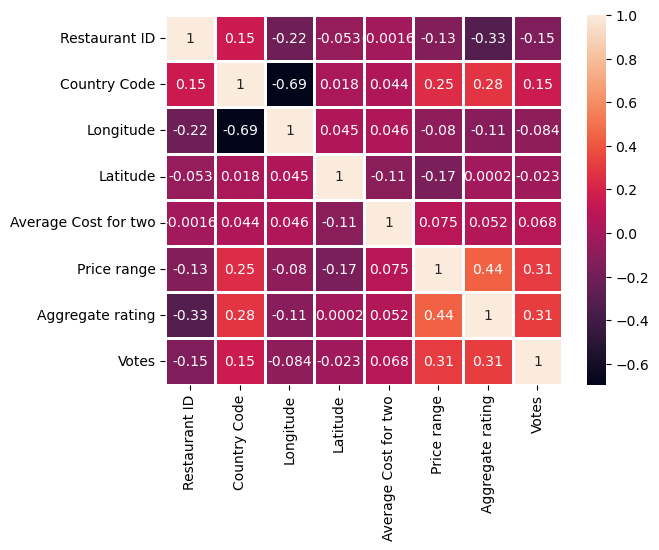

In [11]:
sns.heatmap(df.corr(), annot=True, linewidths=2)
plt.show()

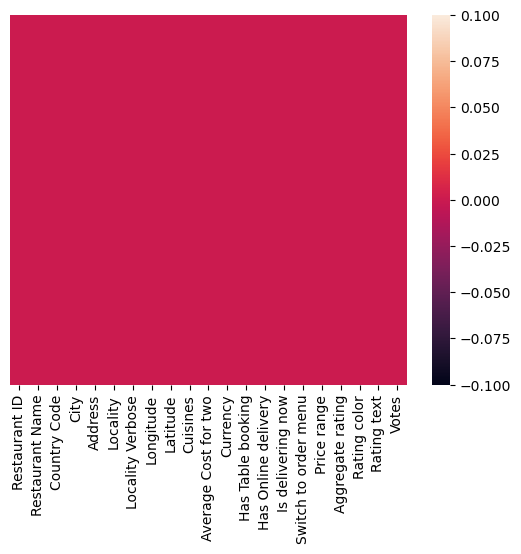

In [12]:
sns.heatmap(df.isna(), yticklabels=False)
plt.show()

##### The missing values is not visible in our heatmap because the number is too small.

In [13]:
# Load country code dataset
df_country = pd.read_excel('/kaggle/input/zomato-restaurants-data/Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


##### Both the dataframe have similar column (i.e. Country code). So, we are joining the dataframes.

In [14]:
# Merge two dataframes 
final_df = pd.merge(df, df_country, on='Country Code', how='left')
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [15]:
country_name = final_df['Country'].value_counts().index
country_value = final_df['Country'].value_counts().values

##### Zomato has maximim number of business in India following by United States.

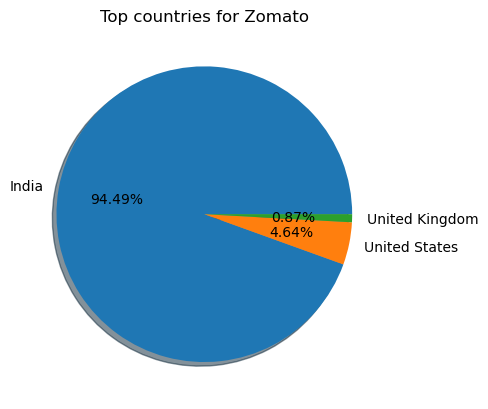

In [16]:
# Pie-chart for top countries that uses zomato
plt.pie(country_value[:3], labels=country_name[:3], shadow=True, autopct='%.2f%%')
plt.title("Top countries for Zomato")
plt.show()

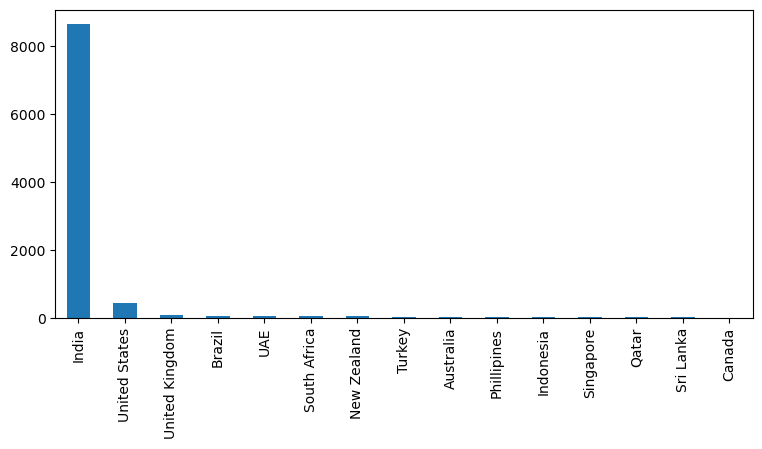

In [17]:
plt.figure(figsize=(9,4))
final_df['Country'].value_counts().plot(kind='bar')
plt.show()

In [18]:
ratings = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

#### Observation:
1. When Rating is between 4.5 - 4.9 ---> Excellent
2. When Rating is between 4 - 4.5 ---> Very Good
3. When Rating is between 3.5 - 3.9 ---> Good
4. When Rating is between 2.5 - 3.4 ---> Average
5. When Rating is between 0 - 2.4 ---> Poor

##### Most of the user have not given ratings.


Text(0.5, 1.0, 'Distribution of aggregate rating')

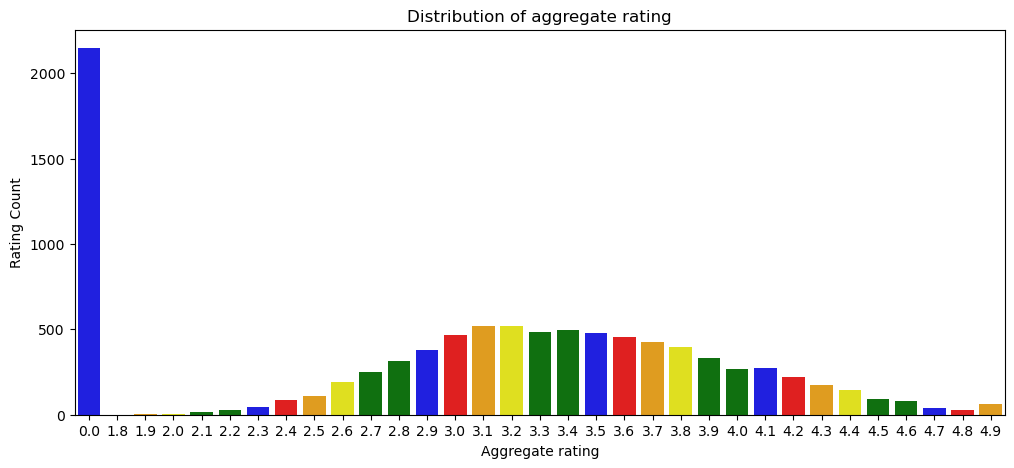

In [19]:
plt.figure(figsize=(12,5))
sns.barplot(x='Aggregate rating', y='Rating Count', data=ratings, palette=['blue','red','orange','yellow','green','green'])
plt.title("Distribution of aggregate rating")

Text(0.5, 1.0, 'Distribution of aggregate rating')

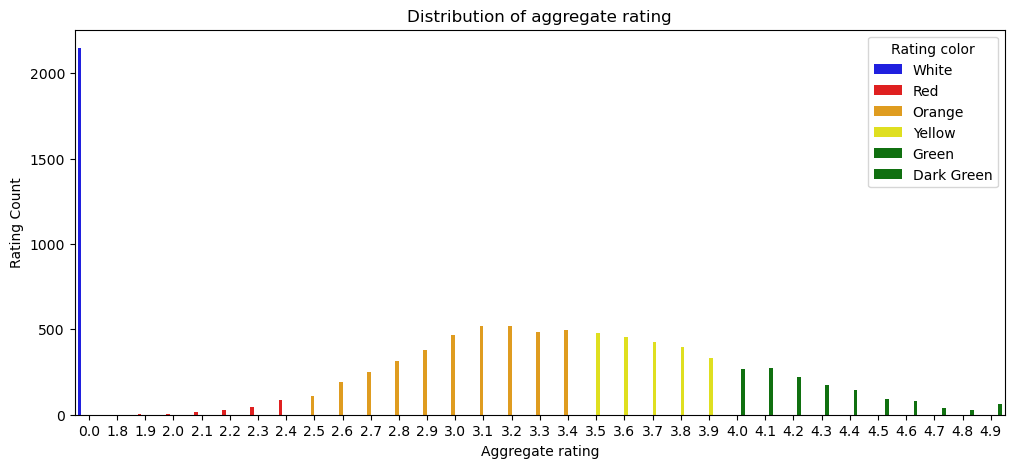

In [20]:
plt.figure(figsize=(12,5))
sns.barplot(x='Aggregate rating', y='Rating Count', data=ratings,hue='Rating color', palette=['blue','red','orange','yellow','green','green'])
plt.title("Distribution of aggregate rating")

Observation:
1. Not Rated count is very high
2. Maximun number of 2.5 to 3.4

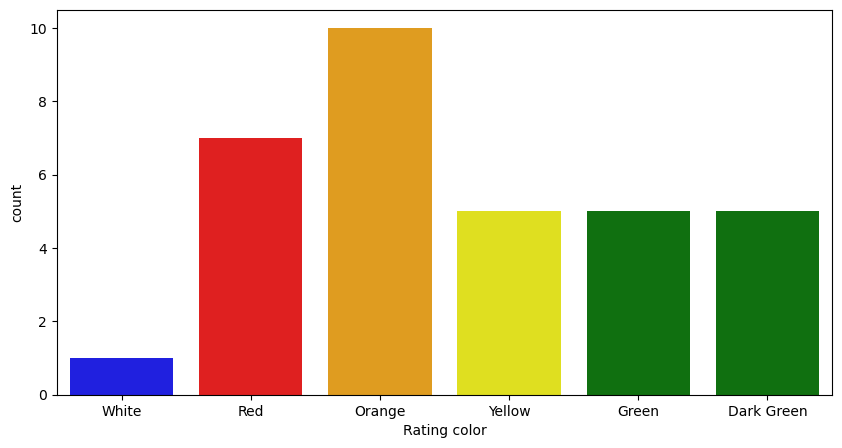

In [21]:
# Countplot
plt.figure(figsize=(10,5))
sns.countplot(x='Rating color', data=ratings, palette=['blue','red','orange','yellow','green','green'])
plt.show()

In [22]:
final_df[final_df['Aggregate rating']==0]['Country'].value_counts()

India             2139
Brazil               5
United States        3
United Kingdom       1
Name: Country, dtype: int64

Observation:
1. India has maximum number of 0 ratings

    

In [23]:
# Country with respective currency
final_df.groupby(['Country', 'Currency']).size().reset_index(name='count').style.background_gradient(cmap='Blues')

,Country,Currency,count
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [24]:
# Country having online delivery option
final_df[final_df['Has Online delivery']=='Yes']['Country'].value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [25]:
# Country who does or does not have online delivery
final_df.groupby(['Has Online delivery','Country']).size().reset_index(name='Count').style.background_gradient(cmap='Blues')

,Has Online delivery,Country,Count
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


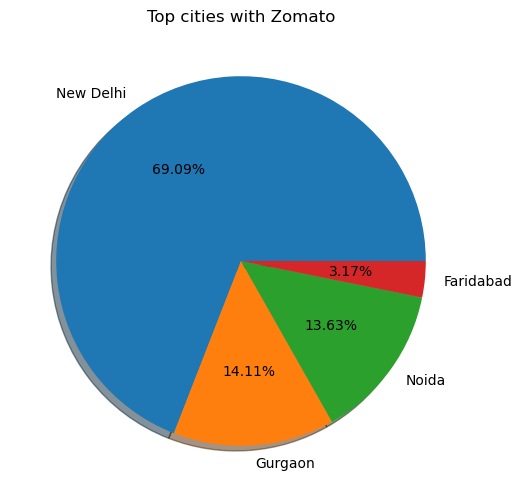

In [26]:
# Top city with Zomato
city = final_df['City'].value_counts().index
city_values = final_df['City'].value_counts().values

plt.figure(figsize=(6,6))
plt.pie(city_values[:4], labels=city[:4], autopct='%.2f%%', shadow=True)
plt.title("Top cities with Zomato")
plt.show()

Observation:
1. All the top cities with Zomato service lies in India.
2. New Delhi is the toppest city.

In [27]:
# Top 5 cuisines
final_df['Cuisines'].value_counts().sort_values(ascending=False)[:5]

North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: Cuisines, dtype: int64

In [28]:
final_df.groupby(['Aggregate rating', 'Rating color']).size().reset_index(name='Count').style.background_gradient(cmap='Blues')

,Aggregate rating,Rating color,Count
0,0.000000,White,2148
1,1.800000,Red,1
2,1.900000,Red,2
3,2.000000,Red,7
4,2.100000,Red,15
5,2.200000,Red,27
6,2.300000,Red,47
7,2.400000,Red,87
8,2.500000,Orange,110
9,2.600000,Orange,191


<Axes: xlabel='Aggregate rating'>

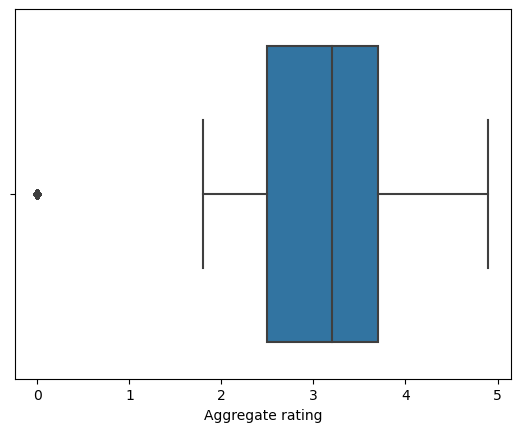

In [29]:
sns.boxplot(x='Aggregate rating', data=final_df)

In [30]:
currency_df = final_df.loc[:, ['Country Code', 'Currency']]
currency_df.value_counts()

Country Code  Currency              
1             Indian Rupees(Rs.)        8652
216           Dollar($)                  425
215           Pounds(£)                  80
30            Brazilian Real(R$)          60
189           Rand(R)                     60
214           Emirati Diram(AED)          60
148           NewZealand($)               40
208           Turkish Lira(TL)            34
14            Dollar($)                   24
162           Botswana Pula(P)            22
94            Indonesian Rupiah(IDR)      21
166           Qatari Rial(QR)             20
184           Dollar($)                   20
191           Sri Lankan Rupee(LKR)       20
37            Dollar($)                    4
dtype: int64

In [31]:
# Table booking facility
final_df[final_df['Has Table booking']=='Yes']['City'].value_counts().sort_values(ascending=False)

New Delhi           715
Gurgaon             204
Noida               112
Faridabad            15
Chennai              13
Pune                 13
Dubai                12
Hyderabad            10
Kolkata               9
Mumbai                9
Abu Dhabi             6
Bangalore             6
London                6
Pasay City            3
Ghaziabad             3
Taguig City           3
Secunderabad          2
Edinburgh             2
Birmingham            2
Manchester            2
Makati City           2
Mandaluyong City      2
Pasig City            2
Tagaytay City         1
San Juan City         1
Doha                  1
Cape Town             1
Johannesburg          1
Name: City, dtype: int64

Observation:
1. New Delhi has most number of table booking facility followed by 'Gurgaon' and 'Noida'

In [32]:
final_df['Has Table booking'].value_counts()

No     8384
Yes    1158
Name: Has Table booking, dtype: int64

In [33]:
# Country with online delivery facility
final_df[final_df['Has Online delivery']=='Yes']['Country'].unique()

array(['UAE', 'India'], dtype=object)

In [34]:
# Country still using online delivery facility
final_df[final_df['Is delivering now']=='Yes']['Country'].unique()

array(['India'], dtype=object)

Observation:
1. India and UAE have online delivery service, but, only India is using online delivery now.

In [35]:
# Indian cities
zomato_India = final_df[final_df['Country']=='India']
zomato_India.shape

(8652, 22)

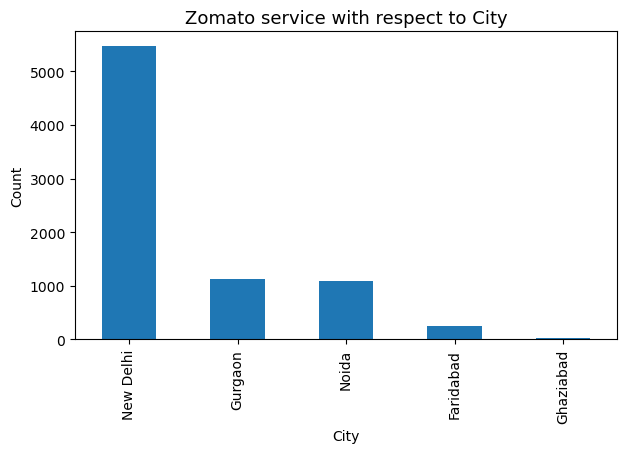

In [36]:
plt.figure(figsize=(7,4))
zomato_India['City'].value_counts().sort_values(ascending=False)[:5].plot(kind='bar')
plt.title("Zomato service with respect to City", fontsize=13)
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

In [37]:
# Average cost as per the country
final_df.groupby('Country')['Average Cost for two'].mean().sort_values(ascending=False).round(2).reset_index(name='Average_cost').style.background_gradient(cmap='Reds')

,Country,Average_cost
0,Indonesia,281190.480000
1,Sri Lanka,2375.000000
2,Phillipines,1606.820000
3,India,623.370000
4,South Africa,419.730000
5,Qatar,223.750000
6,UAE,166.420000
7,Singapore,155.750000
8,Brazil,134.670000
9,Turkey,84.850000


In [38]:
# Avearge cost as per Indian cities
zomato_India.groupby('City')['Average Cost for two'].mean().sort_values(ascending=False)[:5].round(1).reset_index()

,City,Average Cost for two
0,Panchkula,2000.0
1,Hyderabad,1361.1
2,Pune,1337.5
3,Jaipur,1310.0
4,Kolkata,1272.5


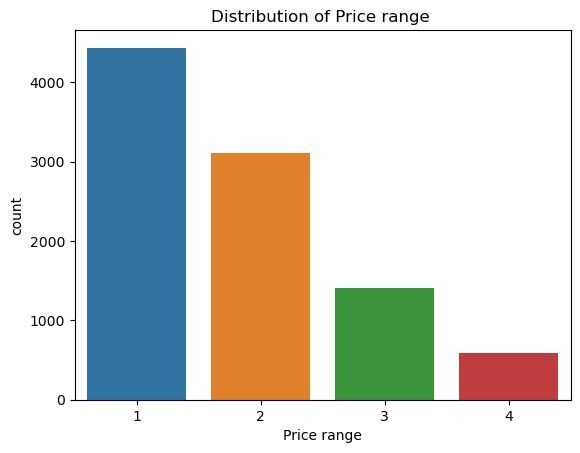

In [39]:
# Price Range
sns.countplot(x='Price range', data=final_df)
plt.title("Distribution of Price range ")
plt.show()

Observation:
* 1 ---> Low price
* 2 ---> Normal Price
* 3 ---> High price
* 4 ---> Very high price


In [40]:
final_df.groupby(['Aggregate rating','Rating color']).size().reset_index(name='Count').style.background_gradient(cmap='Blues')

,Aggregate rating,Rating color,Count
0,0.000000,White,2148
1,1.800000,Red,1
2,1.900000,Red,2
3,2.000000,Red,7
4,2.100000,Red,15
5,2.200000,Red,27
6,2.300000,Red,47
7,2.400000,Red,87
8,2.500000,Orange,110
9,2.600000,Orange,191


In [41]:
# Cities with highest number of very good review
final_df[final_df['Rating color']=='Dark Green']['City'].value_counts().sort_values(ascending=False)[:7]

New Delhi         28
London            15
Gurgaon           12
Rio de Janeiro    11
Tampa Bay         10
Auckland           9
Bangalore          9
Name: City, dtype: int64

In [42]:
# Cities with highest number of bad review
final_df[final_df['Rating color']=='Red']['City'].value_counts().sort_values(ascending=False)[:7]

New Delhi      97
Noida          45
Gurgaon        34
Faridabad       2
Gainesville     1
Mc Millan       1
Montville       1
Name: City, dtype: int64

AS can be seen, New Delhi has highest number of positive as well as negative ratings. This is because, zomato has highest number of service in New Delhi.

In [43]:
final_df['Rating text'].value_counts()

Average      3734
Not rated    2148
Good         2096
Very Good    1078
Excellent     300
Poor          186
Name: Rating text, dtype: int64

In [44]:
print(f"The maximum number of votes is {final_df['Votes'].max()}")
final_df.loc[final_df['Votes']==10934, ['Restaurant Name']]  # Restaurant name that received max votes

The maximum number of votes is 10934


,Restaurant Name
719,Toit


In [45]:
# Details of restaurant that received maximum votes
display(final_df.loc[719, :])

Restaurant ID                                                       51705
Restaurant Name                                                      Toit
Country Code                                                            1
City                                                            Bangalore
Address                 298, Namma Metro Pillar 62, 100 Feet Road, Ind...
Locality                                                      Indiranagar
Locality Verbose                                   Indiranagar, Bangalore
Longitude                                                       77.640709
Latitude                                                        12.979166
Cuisines                                         Italian, American, Pizza
Average Cost for two                                                 2000
Currency                                               Indian Rupees(Rs.)
Has Table booking                                                      No
Has Online delivery                   

In [46]:
# Relation between online delivery service and ratings
final_df[final_df['Has Online delivery']=='Yes']['Rating text'].value_counts()

Average      1105
Good          818
Very Good     277
Poor          116
Not rated      96
Excellent      39
Name: Rating text, dtype: int64

Most people have given Average or Good ratings to those restaurants that have online delivery facility

In [47]:
# Relation between expensive price and ratings
final_df[final_df['Price range']==4]['Rating text'].value_counts()

Good         200
Very Good    194
Average      101
Excellent     74
Not rated     11
Poor           6
Name: Rating text, dtype: int64

Restaurants with expensive prices have got Good and Very Good ratings.

In [48]:
# What if we add 'Has table booking service'
final_df[final_df['Has Table booking']=='Yes'].groupby(['Price range', 'Rating text']).size()

Price range  Rating text
1            Good             1
2            Average        124
             Excellent        3
             Good            57
             Not rated       19
             Poor             5
             Very Good       31
3            Average        201
             Excellent       26
             Good           235
             Not rated       20
             Poor            14
             Very Good      148
4            Average         69
             Excellent       16
             Good           113
             Not rated        8
             Poor             5
             Very Good       63
dtype: int64

People provide Good and Average ratings if restaurant provides table booking facility

<Axes: >

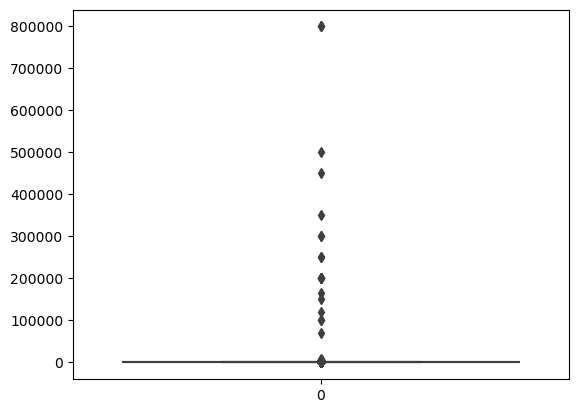

In [49]:
sns.boxplot(final_df['Average Cost for two'])

In [50]:
final_df['Average Cost for two'].describe().loc[['min', 'max', '75%']]

min         0.0
max    800000.0
75%       700.0
Name: Average Cost for two, dtype: float64

In [51]:
final_df['Average Cost for two'].quantile(0.99)

3418.000000000029

Feature 'Average cost for two' is not normal. Some restaurant have high price but, majority have normal price or economical price.

In [52]:
final_df.loc[final_df['Average Cost for two']>3000, ['City']].value_counts()

City            
New Delhi           65
Jakarta             16
Gurgaon              8
Colombo              4
Bogor                2
Noida                2
Tangerang            2
Agra                 1
Bandung              1
Mandaluyong City     1
Pasay City           1
Pretoria             1
dtype: int64

Cities like New Delhi, Jakarta, Guragoan have expensive cuisines.